# Trabajo Integrador - Bootcamp Data Science

**Estudiante**: ## Luis Santaella

El trabajo consiste en desarrollar un proceso de Ciencia de datos sobre un escenario de una entidad financiera.


## Analisis exploratorio

Esta seccion contiene el analisis explotario de los datos.

Se define Columnas con sus tipos de datos y luego  un analisis de cada caracteristica.


Variables:
- ID: identificacodor del cliente.
- LIMIT_BAL: monto de crédito otorgado en dolares.
1
- SEX: genero (1=male, 2=female)
- EDUCATION: educación (1=graduate school, 2=university, 3=high school,
4=others, 5=unknown, 6=unknown)
- MARRIAGE: estado civi (1=married, 2=single, 3=others)
- AGE: edad en años
- PAY_0: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months,
9=payment delay for nine months and above)
- PAY_2: estado de pago a agosto 2005
- PAY_3: estado de pago a julio 2005
- PAY_4: estado de pago a junio 2005
- PAY_5: estado de pago a mayo 2005
- PAY_6: estado de pago a abril 2005
- BILL_AMT1: monto del estado de cuenta a septiembre 2005 en dólares
- BILL_AMT2: monto del estado de cuenta a agosto 2005 en dólares
- BILL_AMT3: monto del estado de cuenta a julio 2005 en dólares
- BILL_AMT4: monto del estado de cuenta a junio 2005 en dólares
- BILL_AMT5: monto del estado de cuenta a mayo 2005 en dólares
- BILL_AMT6: monto del estado de cuenta a abril 2005 en dólares
- PAY_AMT1: importe del pago anterior en septiembre 2005 en dólares
- PAY_AMT2: importe del pago anterior en agosto 2005 en dólares
- PAY_AMT3: importe del pago anterior en julio 2005 en dólares
- PAY_AMT4: importe del pago anterior en junio 2005 en dólares
- PAY_AMT5: importe del pago anterior en mayo 2005 en dólares
- PAY_AMT6: importe del pago anterior en abril 2005 en dólares
- default.payment.next.month: Default payment (1=yes, 0=no)

Importamos la dependecias del proyecto con las que vamos a trabajar

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
## Agregar mas recuersos de ser necesario

In [47]:
#importamos la data
df = pd.read_csv('dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Realizamos el analisis explotario por cada variable para conocer sus valores  y distribuciones.

In [49]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: >

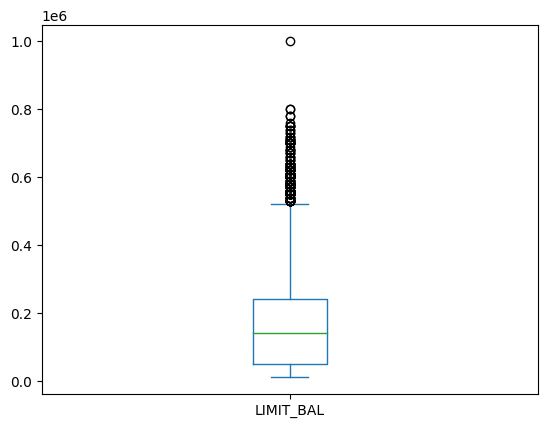

In [50]:
df['LIMIT_BAL'].plot(kind='box')

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


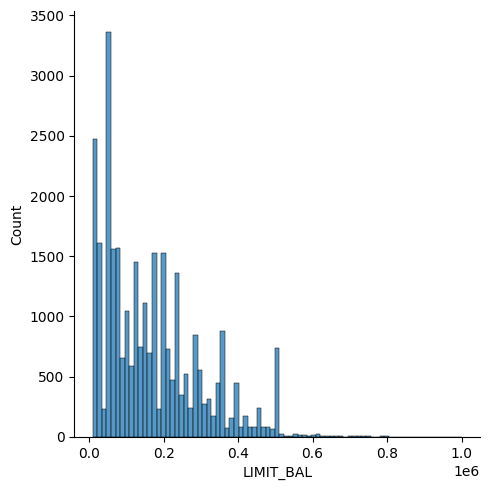

In [51]:
sns.displot(data=df, x='LIMIT_BAL')

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


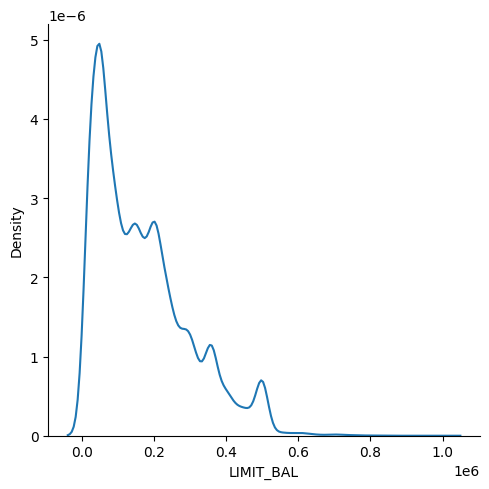

In [52]:
sns.displot(data=df, x='LIMIT_BAL', kind='kde')

A partir del analisis de la distribucion de la variable LIMIT_BAL, se evidencia una concentracion del conjuntoi ide datos en el intervalo [0,600000] aprox.
Los valores superiores a 600000 se podrian considerar como atipicos.

**SEX**

In [53]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<Axes: xlabel='SEX'>

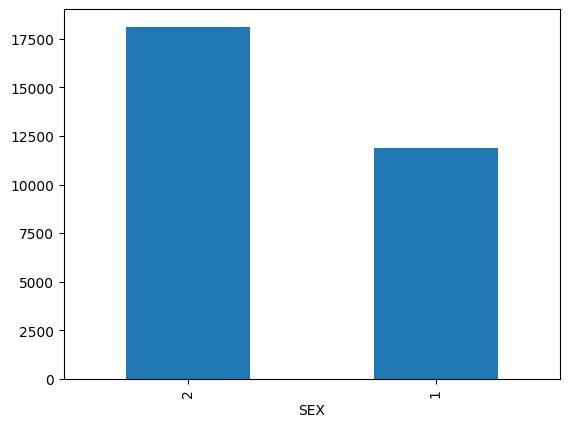

In [54]:
# df['SEX'].plot(kind='hist')
df['SEX'].value_counts().plot(kind="bar") # los graficos de barras para variables categoricas son los mas utiles.

El analisis nos demuestra que la columna esta compuesta de los valores declarados y estan de forma uniforme.

**EDUCATION**                   

In [55]:
# EDUCATION: educación (1=graduate school, 2=university, 3=high school,
# 4=others, 5=unknown, 6=unknown)
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION'>

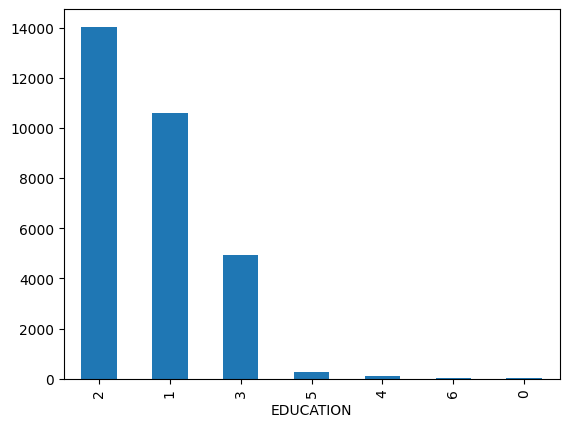

In [56]:
df['EDUCATION'].value_counts().plot(kind="bar")

De acuerdo al analisis 5 y 6 contienen el mismo valor, sin embargo, aparece un valor no declarado que es 0. Tambien que la mayor concentracion de los datos esta en 2 y 1.

**MARRIAGE**: estado civi (1=married, 2=single, 3=others)

In [57]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

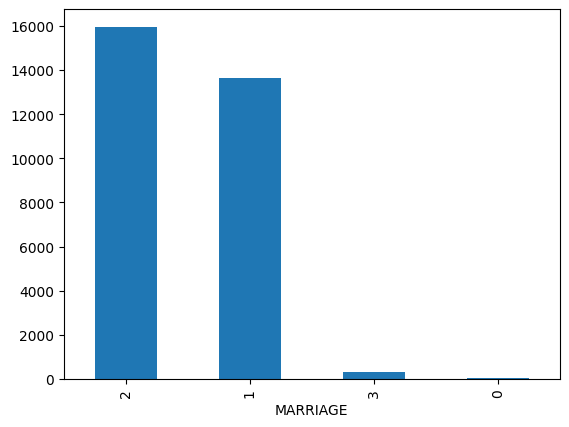

In [58]:
df['MARRIAGE'].value_counts().plot(kind="bar")

Segun el analisis la mayoria de los datos se concentran en 2 y 1. Tambien aparece un valor no declarado que es el 0.

**AGE: edad en años**

In [59]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Edad')

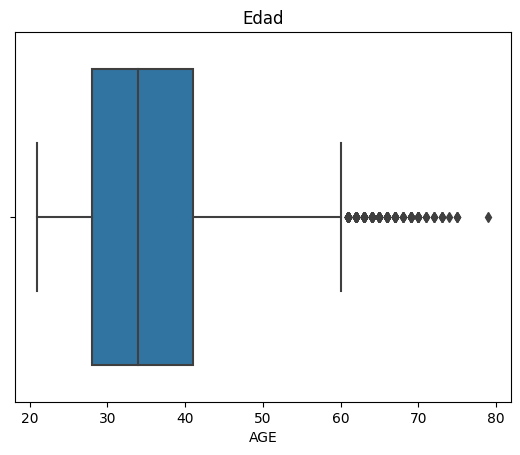

In [60]:

# df['AGE'].value_counts().plot(kind="bar", color='black', title='Age Values')
g = sns.boxplot(x=df["AGE"])
plt.title("Edad")


Podemos observar que la concentracion de la edad va desde un promedio de los 25 a 45.

**PAY_0**: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months,)

In [61]:
df["PAY_0"].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

In [62]:
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


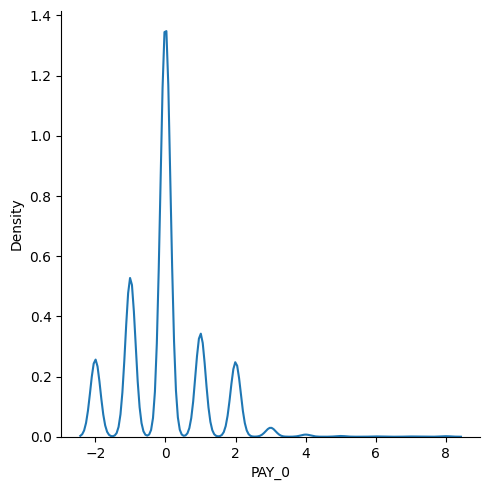

In [63]:
sns.displot(data=df, x='PAY_0', kind='kde')

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


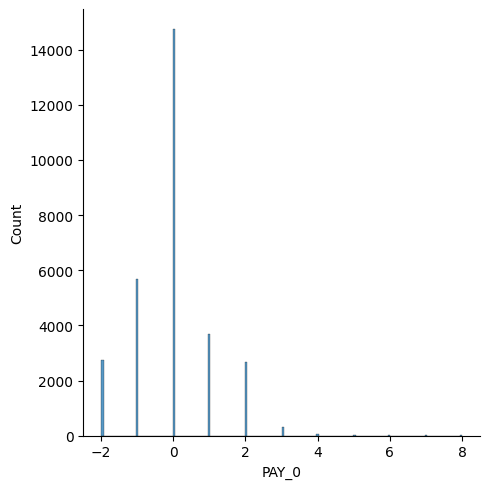

In [64]:
sns.displot(data=df, x='PAY_0')

Visualizando los datos de septiembre en ambos graficos podemos notar que la concentracion se encuentra en la mitad "0" entre pay dulyy  payment delay for one month.

**PAY_2**: estado de pago a agosto 2005

In [65]:
df["PAY_2"].describe()

count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


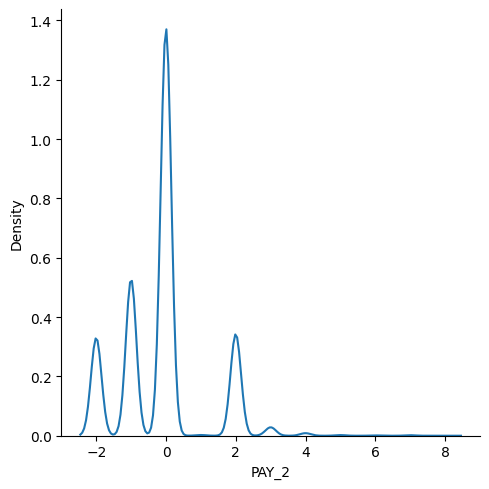

In [66]:
sns.displot(data=df, x='PAY_2', kind='kde')

Visualizando los datos de agosto podemos notar que la concentracion se encuentra en la mitad "0" entre pay dulyy  payment delay for one month.

**PAY_3**: estado de pago a julio 2005

In [67]:
df["PAY_3"].describe()

count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


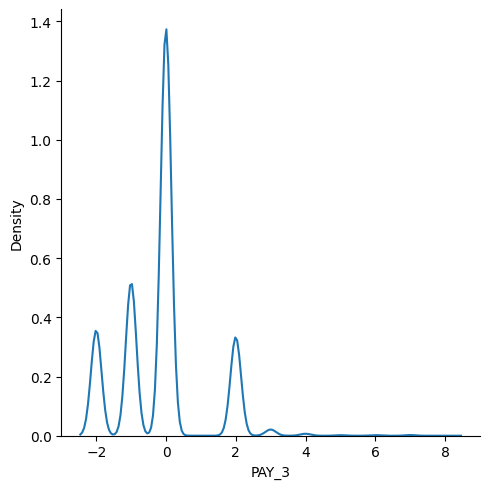

In [68]:
sns.displot(data=df, x='PAY_3', kind='kde')

Visualizando los datos de julio podemos notar que la concentracion se encuentra en la mitad "0" entre pay duly y  payment delay for one month.

**PAY_4**: estado de pago a junio 2005

In [69]:
df["PAY_4"].describe()

count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


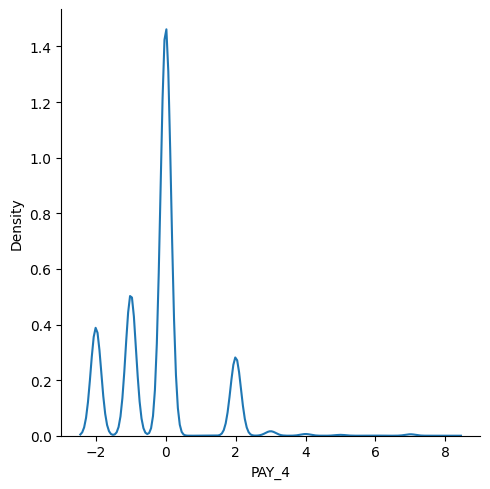

In [70]:
sns.displot(data=df, x='PAY_4', kind='kde')

Visualizando los datos de junio podemos notar que la concentracion se encuentra en la mitad "0" entre pay duly y  payment delay for one month.

**PAY_5**: estado de pago a mayo 2005

In [71]:
df["PAY_5"].describe()

count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


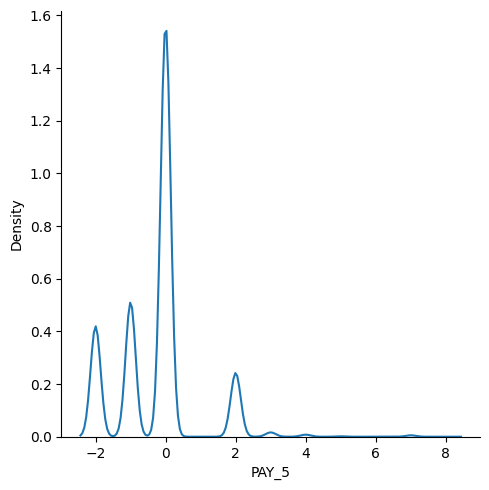

In [72]:
sns.displot(data=df, x='PAY_5', kind='kde')

Visualizando los datos de junio podemos notar que la concentracion se encuentra en la mitad "0" entre pay duly y  payment delay for one month.

**PAY_6**: estado de pago a abril 2005

In [73]:
df["PAY_6"].describe()

count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


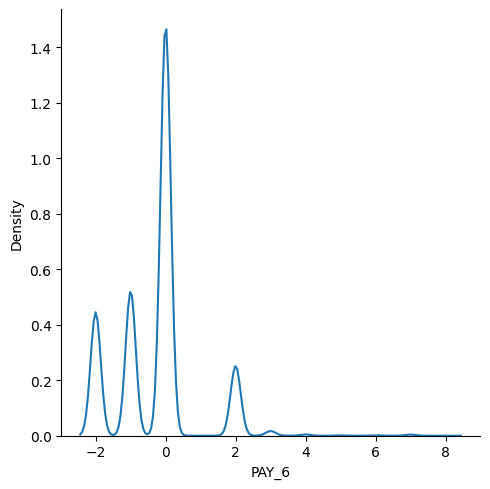

In [74]:
sns.displot(data=df, x='PAY_6', kind='kde')

Visualizando los datos de abril podemos notar que la concentracion se encuentra en la mitad "0" entre pay duly y  payment delay for one month.

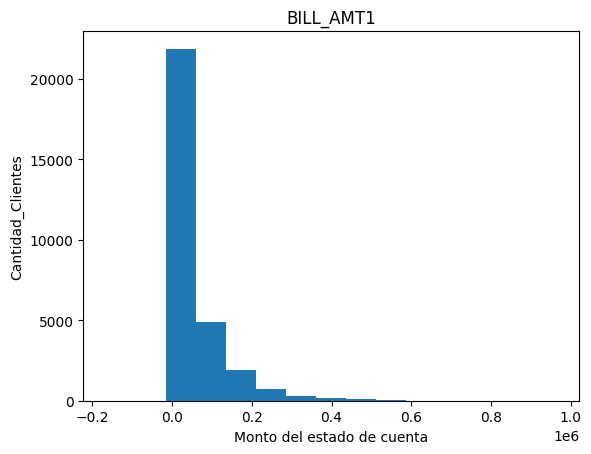

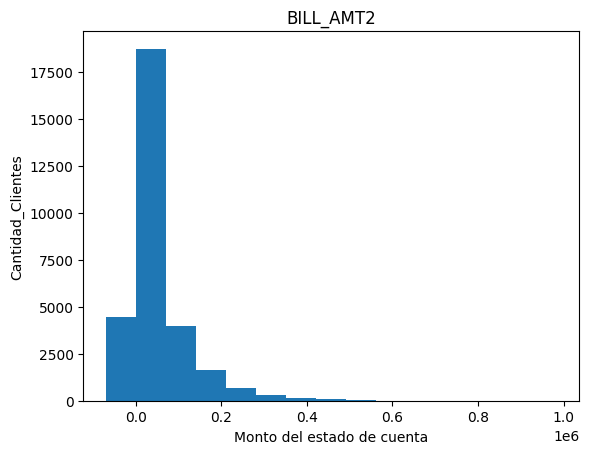

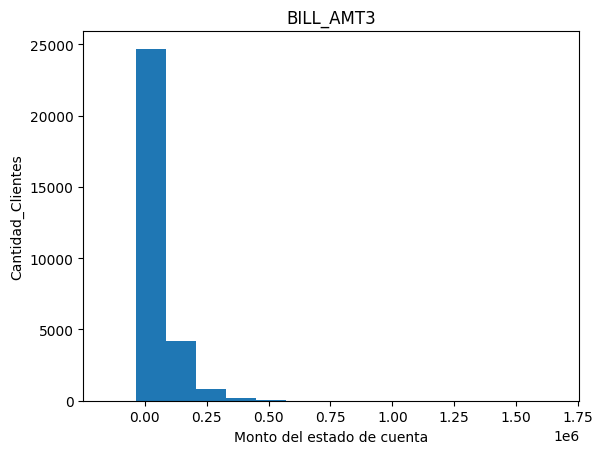

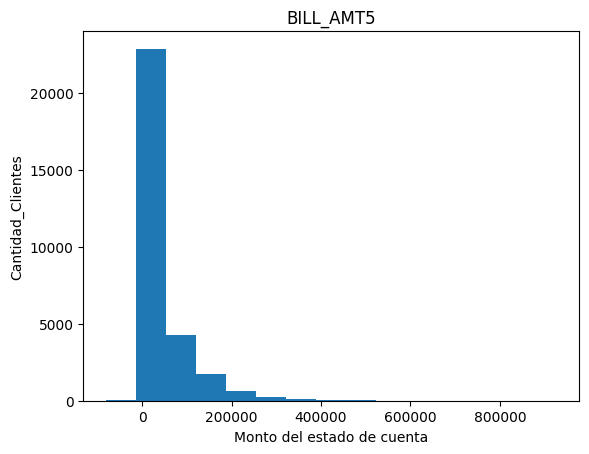

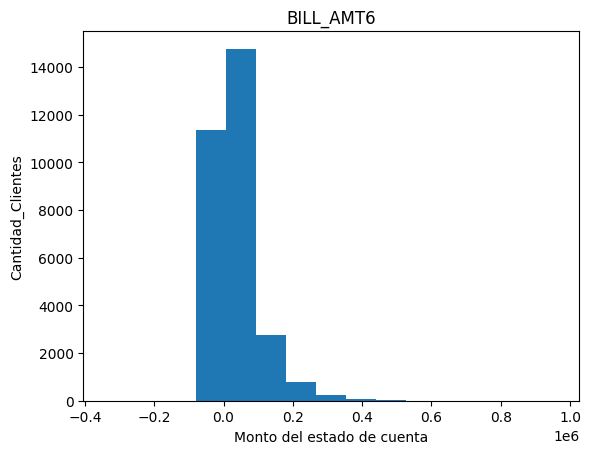

In [75]:
pay = ['BILL_AMT1',
       'BILL_AMT2',
       'BILL_AMT3',
       'BILL_AMT5',
       'BILL_AMT6',]
for columns in pay:
    plt.hist(df[columns], bins=15)
    plt.title(columns), plt.xlabel("Monto del estado de cuenta"), plt.ylabel("Cantidad_Clientes") 
    plt.show()

**PAY_AMT** importe del pago anterior

c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\santaellalf\curso_alkemy\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure

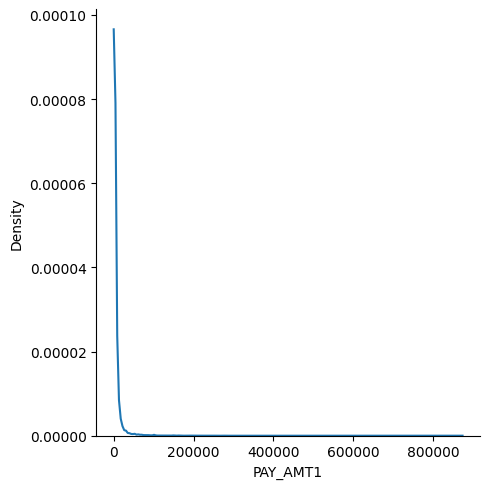

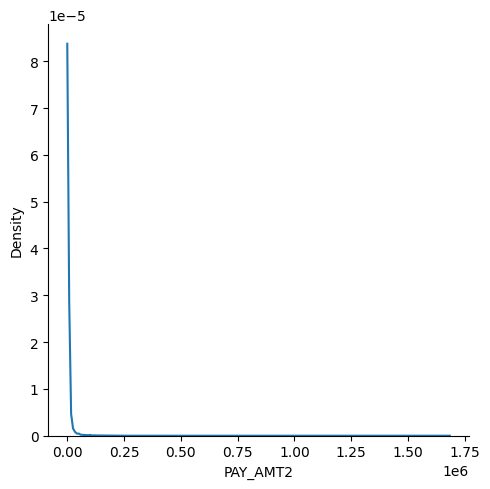

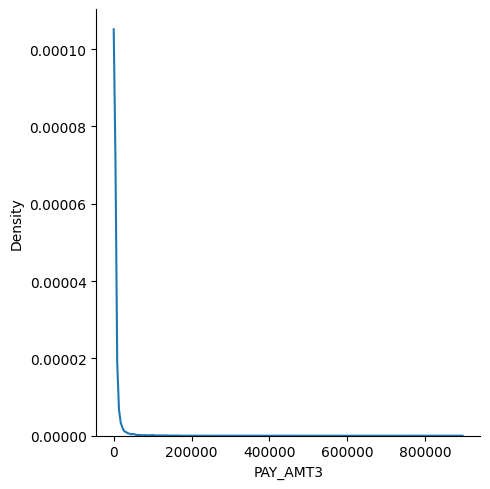

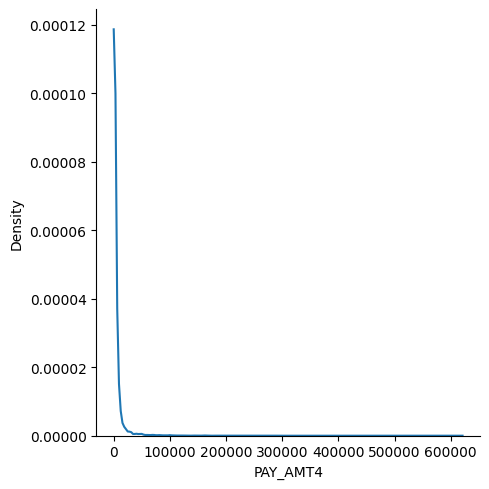

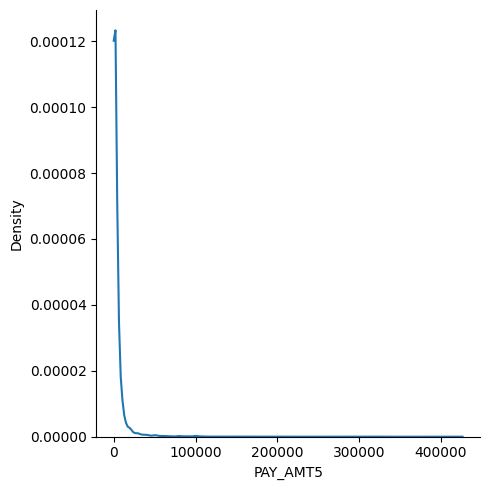

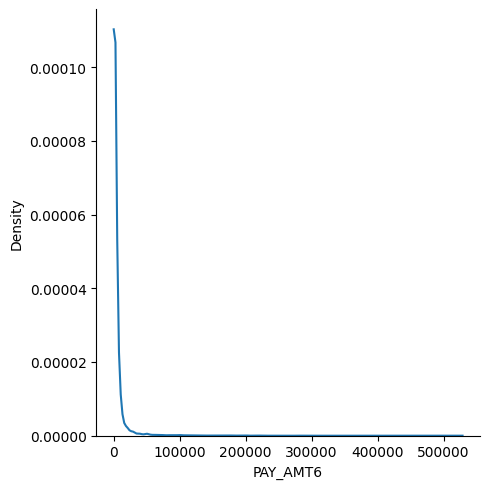

In [76]:
sns.displot(data=df, x='PAY_AMT1', kind='kde', cut=0)
sns.displot(data=df, x='PAY_AMT2', kind='kde', cut=0)
sns.displot(data=df, x='PAY_AMT3', kind='kde', cut=0)
sns.displot(data=df, x='PAY_AMT4', kind='kde', cut=0)
sns.displot(data=df, x='PAY_AMT5', kind='kde', cut=0)
sns.displot(data=df, x='PAY_AMT6', kind='kde', cut=0)

Se puede observar que la mayor concentracion de los datos en todos los meses corresponde a los valores mas bajos.

**default.payment.next.month**

In [77]:
df['default.payment.next.month'].value_counts()


default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='default.payment.next.month'>

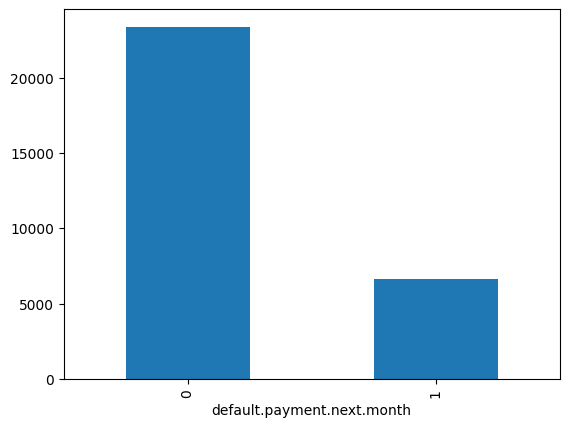

In [78]:
df['default.payment.next.month'].value_counts().plot(kind="bar")

Podemos oberservar que los valores se dividen en 0 y 1 donde la mayor concentracion esta en 0.

## Procesamiento de los datos

Esta sección contiene el tratamiento de los datos, los cuales incluye:
- Tratamiento de nulos
- Normalización
- Codificación de variables categóricas
- Generación de nuevas variables

**Tratamiento de nulos**

In [79]:
missing_values = df.isnull().sum()
missing_values.head()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
dtype: int64

Como se observa no tenemos valores nulos que tratar.

**Normalización**

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes tu dataset en un DataFrame llamado 'df'
# Supongamos también que 'variable1' y 'variable2' son columnas que quieres excluir

# Extraer las columnas numéricas (excepto 'variable1' y 'variable2')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_exclude = ['ID', 'SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar solo las columnas numéricas (excepto 'variable1' y 'variable2')
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,0.010101,2,2,1,0.051724,2,2,-1,-1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,2,0.111111,2,2,2,0.086207,-1,2,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,3,0.080808,2,2,2,0.224138,0,0,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,4,0.040404,2,2,1,0.275862,0,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,5,0.040404,1,2,1,0.620690,-1,0,-1,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0.212121,1,3,1,0.310345,0,0,0,0,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0
29996,29997,0.141414,1,3,2,0.379310,-1,-1,-1,-1,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0
29997,29998,0.020202,1,2,2,0.275862,4,3,2,-1,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1
29998,29999,0.070707,1,3,1,0.344828,1,-1,0,0,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1


**Generación de nuevas variables**

In [81]:
# PAY_0: estado de pago a septiembre 2005 (-1=pay duly, 1=payment delay for
# one month, 2=payment delay for two months, ... 8=payment delay for eight months,
# 9=payment delay for nine months and above)

df['PAY_STATUS'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']

# Aplicar la condición y asignar 1 o 0 a la nueva columna
df['PAY_STATUS'] = df['PAY_STATUS'].apply(lambda x: 1 if x > 0 else 0)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_STATUS
0,1,0.010101,2,2,1,0.051724,2,2,-1,-1,...,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1,0
1,2,0.111111,2,2,2,0.086207,-1,2,0,0,...,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1,1
2,3,0.080808,2,2,2,0.224138,0,0,0,0,...,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,0
3,4,0.040404,2,2,1,0.275862,0,0,0,0,...,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,0
4,5,0.040404,1,2,1,0.620690,-1,0,-1,0,...,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0,0


## Entrenamiento de modelos de Aprendizaje Automático

Esta sección incluye el particionamiento de los datos para el entrenamiento y evaluación de los modelos de Aprendizaje Automático (ML)
Se incluyen:
- Regresión Logística
- SVM
- Árboles de Decisión
- Otros

El proceso de generación de los modelos, se realiza mediante una estrategia de optimización de hiperparámetros (ej: GridSearchCV, RandomizedSearchCV)

In [82]:
from sklearn.model_selection import train_test_split


# Dividir el dataset en características (X) y etiquetas (y)
X = df.drop(columns=['default.payment.next.month'])  
y = df['default.payment.next.month']                

# Dividir los datos en conjuntos de entrenamiento y prueba
# El test_size es el porcentaje del dataset que se utilizará como conjunto de prueba (en este caso, 20%)
# random_state es una semilla para hacer la división reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supongamos que tienes tus conjuntos de entrenamiento y prueba en X_train, X_test, y_train, y_test

# Crear un objeto de árbol de decisión
tree_classifier = DecisionTreeClassifier(ccp_alpha=0.001)

# Entrenar el modelo con el conjunto de entrenamiento
tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Opcionalmente, puedes imprimir el reporte de clasificación y la matriz de confusión
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.82
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.32      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000

Matriz de confusión:
[[4498  189]
 [ 895  418]]


In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': np.arange(0, 0.01, 0.001)}
pruned_tree_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(pruned_tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

optimal_ccp_alpha = grid_search.best_params_['ccp_alpha']


In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001)

In [89]:
grid_search.best_params_

{'ccp_alpha': 0.001}